
Insyiraah Oxaichiko Arissinta



Submission Dicoding "Belajar Machine Learning Untuk Pemula"

Kriteria Submission
>Berikut kriteria submission yang harus Anda penuhi:


1.  Dataset harus dibagi menjadi train set dan validation set.Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
2. Harus mengimplementasikan augmentasi gambar.
3. Menggunakan image data generator.
4. Model harus menggunakan model sequential.
5. Pelatihan model tidak melebihi waktu 30 menit.
6. Program dikerjakan pada Google Colaboratory.
7. Akurasi dari model minimal 85%.
8. Dapat memprediksi gambar yang diunggah ke Colab


## Mengenali Rock, Paper & Scissors dengan TensorFlow

 Setup dan Import Library
>Input library yang dibutuhkan dalam load dataset seperti gambar dalam folder,data gambar dll.

1. Install split-folder untuk memisahkan file (Membagi folder dengan file (misal Gambar) menjadi folder data latih, validation, dan test (dataset).
2. Input Library untuk Dataset

In [ ]:
pip install split-folders

Langkah selanjutnya mengimport Library TensorFlow, Keras dan memasukkan dataset yang sudah disediakan oleh dicoding.

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
print(tf.__version__)

2.5.0


In [ ]:

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-26 00:48:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.49MB/s    in 85s     

2021-07-26 00:50:09 (3.64 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Mengkestrak Dataset

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Selanjutnya Callback 
>Callback berfungsi untuk mencegah overfitting serta menghentikan training ketika akurasi terpenuhi

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi telah mencapai 97%, proses training dihentikan!")
      self.model.stop_training = True

callbacks = myCallback()

Split dataset dan selanjutnya akan dibuat direktori

In [ ]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [ ]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

Train dan Split Dataset
>Membagi direktori menjadi data train dan data validasi(dengan minimal validasi 40%)


In [ ]:
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [ ]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # dimana 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # dimana 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 47s - loss: 1.2135 - accuracy: 0.4261 - val_loss: 0.8658 - val_accuracy: 0.6528
Epoch 2/20
41/41 - 15s - loss: 0.7204 - accuracy: 0.7027 - val_loss: 0.5335 - val_accuracy: 0.8171
Epoch 3/20
41/41 - 16s - loss: 0.4319 - accuracy: 0.8323 - val_loss: 0.3572 - val_accuracy: 0.8715
Epoch 4/20
41/41 - 16s - loss: 0.2981 - accuracy: 0.8948 - val_loss: 0.2667 - val_accuracy: 0.9039
Epoch 5/20
41/41 - 15s - loss: 0.2301 - accuracy: 0.9200 - val_loss: 0.2558 - val_accuracy: 0.9236
Epoch 6/20
41/41 - 15s - loss: 0.2151 - accuracy: 0.9261 - val_loss: 0.2238 - val_accuracy: 0.9236
Epoch 7/20
41/41 - 16s - loss: 0.1678 - accuracy: 0.9306 - val_loss: 0.2187 - val_accuracy: 0.9294
Epoch 8/20
41/41 - 16s - loss: 0.1847 - accuracy: 0.9284 - val_loss: 0.1775 - val_accuracy: 0.9514
Epoch 9/20
41/41 - 15s - loss: 0.1726 - accuracy: 0.9367 - val_loss: 0.2256 - val_accuracy: 0.9340
Epoch 10/20
41/41 - 15s - loss: 0.1815 - accuracy: 0.9352 - val_loss: 0.1775 - val_accuracy: 0.9433
Epoch 11/

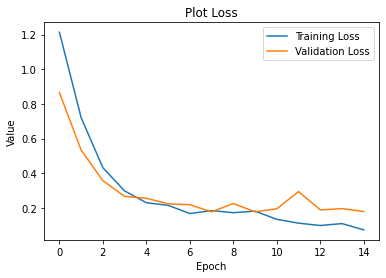

In [ ]:
from matplotlib import pyplot as plt
#cek loss train dan validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Plot Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

Mengecek akurasi train dan validation

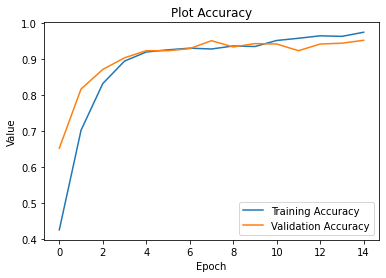

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Plot Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Tes Dengan Input Gambar

Saving kertas.jpg to kertas (1).jpg
kertas.jpg
paper


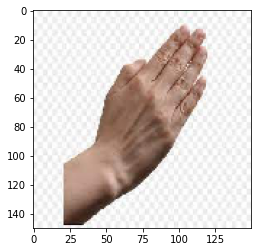

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')